In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

config = tf.ConfigProto(
    gpu_options=tf.GPUOptions(
    allow_growth=True
    ))

In [2]:
# Recovery action の入ったデータ
'''
r_path = '../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/'
contents = os.listdir(r_path)
data = pd.DataFrame()
num = 0
for c in range(len(contents)):
    print(r_path+contents[c])
    n_data = pd.read_csv(r_path+contents[c],header=None)
    data = pd.concat([data,n_data])
'''

"\nr_path = '../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/'\ncontents = os.listdir(r_path)\ndata = pd.DataFrame()\nnum = 0\nfor c in range(len(contents)):\n    print(r_path+contents[c])\n    n_data = pd.read_csv(r_path+contents[c],header=None)\n    data = pd.concat([data,n_data])\n"

In [3]:
# ブレることなくボールをゴールに運んだデータ
'''
target_path = '/home/yota/workspace/Study/m1/data/LOG_G/ConvertData/convData.csv'
data = pd.read_csv(target_path,header=None)

print(data)
d = data
#print(ball)
#print(joy)
'''

             0         1         2         3         4             5    6   \
0      0.212240  0.274517  3.509918  0.147832  1.500105 -1.099784e+00  4.8   
1      0.212240  0.274517  3.509918  0.147832  1.500105 -1.099784e+00  4.8   
2      0.212240  0.274517  3.509918  0.147832  1.500105 -1.099784e+00  4.8   
3      0.212240  0.274517  3.509918  0.147832  1.500105 -1.099784e+00  4.8   
4      0.212240  0.274517  3.509918  0.147832  1.500105 -1.099784e+00  4.8   
5      0.212240  0.274517  3.509918  0.147832  1.500105 -1.099784e+00  4.8   
6      0.212240  0.274517  3.509918  0.147832  1.500105 -1.099784e+00  4.8   
7      0.212240  0.274517  3.509918  0.147832  1.500105 -1.099784e+00  4.8   
8      0.212240  0.274518  3.509920  0.147873  1.500105 -1.099784e+00  4.8   
9      0.212240  0.274518  3.509920  0.147873  1.500105 -1.099784e+00  4.8   
10     0.212240  0.274518  3.509920  0.147873  1.500105 -1.099784e+00  4.8   
11     0.212240  0.274518  3.509920  0.147873  1.500105 -1.09978

In [4]:
d.columns = ['l_bx','l_by','lc_gx','cl_gy','g_bx','g_by','g_pole0x','g_pole0y','g_pole1x','g_pole1y','g_px','g_py','g_pth','ljx','ljy','rjx','rjy']
#d = d[d.bx!=-1]

In [5]:
'''
from sklearn.cross_validation import train_test_split
t1 = []
t2 = []
def f1(x,y):
    return y * np.sin(x) + np.square(x)
def f2(x,y):
    return x * np.cos(y) + np.square(y)
for a in range(1000):
    r = np.array([np.random.rand(), np.random.rand()])
    t1.append(r)
    t2.append(np.array([ f1(r[0],r[1]),f2(r[0],r[1]) ]))
IN_train, IN_test, TAR_train, TAR_test = train_test_split(t1,t2,test_size=0.2,random_state=0)

IN_train = np.array(IN_train)
IN_test = np.array(IN_test)
TAR_train = np.array(TAR_train)
TAR_test = np.array(TAR_test)
print(IN_train[0])
print(IN_test[0])
print(TAR_train[0])
print(TAR_test[0])
print(f1(1,1))
print(f2(1,1))
'''

'\nfrom sklearn.cross_validation import train_test_split\nt1 = []\nt2 = []\ndef f1(x,y):\n    return y * np.sin(x) + np.square(x)\ndef f2(x,y):\n    return x * np.cos(y) + np.square(y)\nfor a in range(1000):\n    r = np.array([np.random.rand(), np.random.rand()])\n    t1.append(r)\n    t2.append(np.array([ f1(r[0],r[1]),f2(r[0],r[1]) ]))\nIN_train, IN_test, TAR_train, TAR_test = train_test_split(t1,t2,test_size=0.2,random_state=0)\n\nIN_train = np.array(IN_train)\nIN_test = np.array(IN_test)\nTAR_train = np.array(TAR_train)\nTAR_test = np.array(TAR_test)\nprint(IN_train[0])\nprint(IN_test[0])\nprint(TAR_train[0])\nprint(TAR_test[0])\nprint(f1(1,1))\nprint(f2(1,1))\n'

In [6]:
from sklearn.cross_validation import train_test_split

IN_size = 4
TAR_size = 3
'''
l_ball = np.array(d.iloc[:,0:2])   #  0, 1
l_pole0 = np.array(d.iloc[:,2:4])  #  2, 3
l_pole1 = np.array(d.iloc[:,4:6])  #  4, 5
g_ball = np.array(d.iloc[:,6:8])   #  6, 7
g_pole0 = np.array(d.iloc[:,8:10]) #  8, 9
g_pole1 = np.array(d.iloc[:,10:12])# 10,11
g_pos = np.array(d.iloc[:,12:15])  # 12,13,14
ljoy = np.array(d.iloc[:,15:17])   # 15,16
rjoy = np.array(d.iloc[:,17:19])   # 17,18
'''
l_ball = np.array(d.iloc[:,0:2])   #  0, 1
lc_goal = np.array(d.iloc[:,2:4])  #  2, 3
g_ball = np.array(d.iloc[:,4:6])   #  4, 5
g_pole0 = np.array(d.iloc[:,6:8]) #  6, 7
g_pole1 = np.array(d.iloc[:,8:10])# 8,9
g_pos = np.array(d.iloc[:,10:13])  # 10,11,12
ljoy = np.array(d.iloc[:,13:15])   # 13,14
rjoy = np.array(d.iloc[:,15:17])   # 15,16

input_d = np.array(d.iloc[:,0:IN_size])
output_d = np.array(d.iloc[:,13:16])
print(input_d.shape)
print(output_d.shape)



IN_train, IN_test, TAR_train, TAR_test = train_test_split(input_d,output_d,test_size=0.1,random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
#IN_train = IN_train/100.0
#IN_test = IN_test/100.0
for t in range(10):
    print(IN_train[t])
'''
print(IN_train[0])
print(IN_test[0])
print(TAR_train[0])
print(TAR_test[0])
'''

(59018, 4)
(59018, 3)
[0.84014753 0.17468594 2.27397744 1.13097117]
[ 0.34259257  0.02941903  1.01689678 -1.28106929]
[ 0.33117676 -0.33743405  1.81986345 -2.48076808]
[ 0.61591974 -0.1398737   2.79495452 -1.04204329]
[ 0.19923238  0.0218821   2.63277889 -2.04039994]
[1.27779411 0.60440076 2.96844262 3.08294252]
[0.81185694 0.29834927 2.07211931 1.27801859]
[ 0.30064744 -0.10221874  1.941217   -0.91511713]
[ 0.40105007 -0.10468939  0.76281749 -0.86996909]
[1.53980724 0.12048405 4.07768895 2.23012248]


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'\nprint(IN_train[0])\nprint(IN_test[0])\nprint(TAR_train[0])\nprint(TAR_test[0])\n'

In [7]:
#　初期化
sess = tf.Session(config=config)
test_sess = tf.Session(config=config)

INPUT = tf.placeholder(shape=[None, IN_size], dtype=tf.float32)
TARGET = tf.placeholder(shape=[None, TAR_size], dtype=tf.float32)

In [8]:
#hidden_size = [100]
hidden_size = [30,8]
batch_size = 100
iter_size = 200000

#　隠れ層の作成 （last layerに直結）
weights = []
biases = []
layers = []
tmp_size = IN_size
last_layer = INPUT
for hsize in hidden_size:
    weights.append(tf.Variable(tf.random_normal(shape=[tmp_size, hsize])))
    biases.append(tf.Variable(tf.random_normal(shape=[hsize])))
    layers.append(tf.nn.relu(tf.add(tf.matmul(last_layer, weights[-1]), biases[-1]))) # 活性化関数
    tmp_size = hsize
    last_layer = layers[-1]
    print(layers[-1])
#　出力層
weights.append(tf.Variable(tf.random_normal(shape=[tmp_size, TAR_size])))
biases.append(tf.Variable(tf.random_normal(shape=[TAR_size])))
layers.append(tf.add(tf.matmul(last_layer, weights[-1]), biases[-1]))
final_output = layers[-1]
print(final_output)

Tensor("Relu:0", shape=(?, 30), dtype=float32)
Tensor("Relu_1:0", shape=(?, 8), dtype=float32)
Tensor("Add_2:0", shape=(?, 3), dtype=float32)


In [9]:
#　学習
loss = tf.losses.mean_squared_error(TARGET,final_output)
test_loss = tf.losses.mean_squared_error(TARGET,final_output)
opt = tf.train.AdamOptimizer(0.001)
#opt = tf.train.GradientDescentOptimizer(0.01)
train_step = opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)
test_sess.run(init)
loss_vec=[]
test_loss_vec=[]
for i in range(iter_size):
    train_rand_index = np.random.choice(len(IN_train), size=batch_size,replace=False)
    train_rand_in = IN_train[train_rand_index]
    train_rand_tar = TAR_train[train_rand_index]
    sess.run(train_step, feed_dict={INPUT:train_rand_in, TARGET: train_rand_tar})
    loss_vec.append(sess.run(loss, feed_dict={INPUT:train_rand_in, TARGET: train_rand_tar}))
    
    test_rand_index = np.random.choice(len(IN_test), size=batch_size,replace=False)
    test_rand_in = IN_test[test_rand_index]
    test_rand_tar = TAR_test[test_rand_index]
    test_sess.run(train_step, feed_dict={INPUT:test_rand_in, TARGET: test_rand_tar})
    test_loss_vec.append(test_sess.run(test_loss, feed_dict={INPUT:test_rand_in, TARGET: test_rand_tar}))
    
    if (i+1)%100==0:
#        print(sess.run(INPUT, feed_dict={INPUT:rand_in, TARGET: rand_tar}))
        print('Generation:'+str(i+1)+', Loss = '+str(loss_vec[-1]))

Generation:100, Loss = 23.590649
Generation:200, Loss = 6.4936233
Generation:300, Loss = 4.564474
Generation:400, Loss = 2.903776
Generation:500, Loss = 2.0114746
Generation:600, Loss = 6.603954
Generation:700, Loss = 0.90101004
Generation:800, Loss = 1.1698723
Generation:900, Loss = 0.6351703
Generation:1000, Loss = 0.78356856
Generation:1100, Loss = 0.52801824
Generation:1200, Loss = 0.5120302
Generation:1300, Loss = 0.4140589
Generation:1400, Loss = 0.3271737
Generation:1500, Loss = 0.41451475
Generation:1600, Loss = 0.46794143
Generation:1700, Loss = 0.3275574
Generation:1800, Loss = 0.29179093
Generation:1900, Loss = 0.34196305
Generation:2000, Loss = 0.2721803
Generation:2100, Loss = 0.3222689
Generation:2200, Loss = 0.32044178
Generation:2300, Loss = 0.21555991
Generation:2400, Loss = 0.20966014
Generation:2500, Loss = 0.23455943
Generation:2600, Loss = 0.2206693
Generation:2700, Loss = 0.18949988
Generation:2800, Loss = 0.21699473
Generation:2900, Loss = 0.17194714
Generation:3

Generation:23100, Loss = 0.0626464
Generation:23200, Loss = 0.058045056
Generation:23300, Loss = 0.049677037
Generation:23400, Loss = 0.05633129
Generation:23500, Loss = 0.054203846
Generation:23600, Loss = 0.05145838
Generation:23700, Loss = 0.07264101
Generation:23800, Loss = 0.04579807
Generation:23900, Loss = 0.06768257
Generation:24000, Loss = 0.044344287
Generation:24100, Loss = 0.059547227
Generation:24200, Loss = 0.045955323
Generation:24300, Loss = 0.05574302
Generation:24400, Loss = 0.053232487
Generation:24500, Loss = 0.055078786
Generation:24600, Loss = 0.04316843
Generation:24700, Loss = 0.05366218
Generation:24800, Loss = 0.05468415
Generation:24900, Loss = 0.048508782
Generation:25000, Loss = 0.05787173
Generation:25100, Loss = 0.054485545
Generation:25200, Loss = 0.057907168
Generation:25300, Loss = 0.054373607
Generation:25400, Loss = 0.04334657
Generation:25500, Loss = 0.06068219
Generation:25600, Loss = 0.05867475
Generation:25700, Loss = 0.0517249
Generation:25800, 

Generation:45600, Loss = 0.04009974
Generation:45700, Loss = 0.046819292
Generation:45800, Loss = 0.048502617
Generation:45900, Loss = 0.044420622
Generation:46000, Loss = 0.048350774
Generation:46100, Loss = 0.054854233
Generation:46200, Loss = 0.045631707
Generation:46300, Loss = 0.057103813
Generation:46400, Loss = 0.04268976
Generation:46500, Loss = 0.051356945
Generation:46600, Loss = 0.055948626
Generation:46700, Loss = 0.0446052
Generation:46800, Loss = 0.04431448
Generation:46900, Loss = 0.050426725
Generation:47000, Loss = 0.04804411
Generation:47100, Loss = 0.045510046
Generation:47200, Loss = 0.049501777
Generation:47300, Loss = 0.05063931
Generation:47400, Loss = 0.04958895
Generation:47500, Loss = 0.057951953
Generation:47600, Loss = 0.0597063
Generation:47700, Loss = 0.041620906
Generation:47800, Loss = 0.05068446
Generation:47900, Loss = 0.039751258
Generation:48000, Loss = 0.047213875
Generation:48100, Loss = 0.04072093
Generation:48200, Loss = 0.04419538
Generation:483

Generation:68000, Loss = 0.04186343
Generation:68100, Loss = 0.04554108
Generation:68200, Loss = 0.050028417
Generation:68300, Loss = 0.05217861
Generation:68400, Loss = 0.04409752
Generation:68500, Loss = 0.043772243
Generation:68600, Loss = 0.050840884
Generation:68700, Loss = 0.050826743
Generation:68800, Loss = 0.052699473
Generation:68900, Loss = 0.04407257
Generation:69000, Loss = 0.05525402
Generation:69100, Loss = 0.04830752
Generation:69200, Loss = 0.057064936
Generation:69300, Loss = 0.04718873
Generation:69400, Loss = 0.03968042
Generation:69500, Loss = 0.040328585
Generation:69600, Loss = 0.048328467
Generation:69700, Loss = 0.051920407
Generation:69800, Loss = 0.04163676
Generation:69900, Loss = 0.047087178
Generation:70000, Loss = 0.053825863
Generation:70100, Loss = 0.04816287
Generation:70200, Loss = 0.050596356
Generation:70300, Loss = 0.045291696
Generation:70400, Loss = 0.045781948
Generation:70500, Loss = 0.04742532
Generation:70600, Loss = 0.050652277
Generation:70

Generation:90400, Loss = 0.051593266
Generation:90500, Loss = 0.042204976
Generation:90600, Loss = 0.041805074
Generation:90700, Loss = 0.040206708
Generation:90800, Loss = 0.03475607
Generation:90900, Loss = 0.04093378
Generation:91000, Loss = 0.039712828
Generation:91100, Loss = 0.04095311
Generation:91200, Loss = 0.049349796
Generation:91300, Loss = 0.0379127
Generation:91400, Loss = 0.043186344
Generation:91500, Loss = 0.042110305
Generation:91600, Loss = 0.03949667
Generation:91700, Loss = 0.046008833
Generation:91800, Loss = 0.04441432
Generation:91900, Loss = 0.048437666
Generation:92000, Loss = 0.040543377
Generation:92100, Loss = 0.0417659
Generation:92200, Loss = 0.040700167
Generation:92300, Loss = 0.04228863
Generation:92400, Loss = 0.043369353
Generation:92500, Loss = 0.035777405
Generation:92600, Loss = 0.048178878
Generation:92700, Loss = 0.052704588
Generation:92800, Loss = 0.04910831
Generation:92900, Loss = 0.04585483
Generation:93000, Loss = 0.04455522
Generation:931

Generation:112500, Loss = 0.047104064
Generation:112600, Loss = 0.04921329
Generation:112700, Loss = 0.0422287
Generation:112800, Loss = 0.05552433
Generation:112900, Loss = 0.043902185
Generation:113000, Loss = 0.037162583
Generation:113100, Loss = 0.043800972
Generation:113200, Loss = 0.04265624
Generation:113300, Loss = 0.045459498
Generation:113400, Loss = 0.04171329
Generation:113500, Loss = 0.056577556
Generation:113600, Loss = 0.04506804
Generation:113700, Loss = 0.05269188
Generation:113800, Loss = 0.050594777
Generation:113900, Loss = 0.04190452
Generation:114000, Loss = 0.045403976
Generation:114100, Loss = 0.046608176
Generation:114200, Loss = 0.04329481
Generation:114300, Loss = 0.04317794
Generation:114400, Loss = 0.048156343
Generation:114500, Loss = 0.037266202
Generation:114600, Loss = 0.04025696
Generation:114700, Loss = 0.043595303
Generation:114800, Loss = 0.0434192
Generation:114900, Loss = 0.033805944
Generation:115000, Loss = 0.040060546
Generation:115100, Loss = 

Generation:134400, Loss = 0.046481244
Generation:134500, Loss = 0.036683094
Generation:134600, Loss = 0.039047036
Generation:134700, Loss = 0.047133535
Generation:134800, Loss = 0.050543178
Generation:134900, Loss = 0.041372504
Generation:135000, Loss = 0.038077906
Generation:135100, Loss = 0.031452514
Generation:135200, Loss = 0.04909668
Generation:135300, Loss = 0.033853665
Generation:135400, Loss = 0.05271522
Generation:135500, Loss = 0.045410406
Generation:135600, Loss = 0.037179746
Generation:135700, Loss = 0.047725163
Generation:135800, Loss = 0.04087816
Generation:135900, Loss = 0.038141325
Generation:136000, Loss = 0.043752316
Generation:136100, Loss = 0.042672124
Generation:136200, Loss = 0.04693144
Generation:136300, Loss = 0.043515444
Generation:136400, Loss = 0.053862914
Generation:136500, Loss = 0.047025334
Generation:136600, Loss = 0.03963782
Generation:136700, Loss = 0.043560818
Generation:136800, Loss = 0.047431637
Generation:136900, Loss = 0.045817707
Generation:137000

Generation:156200, Loss = 0.03915274
Generation:156300, Loss = 0.04938156
Generation:156400, Loss = 0.047966946
Generation:156500, Loss = 0.04246583
Generation:156600, Loss = 0.03607354
Generation:156700, Loss = 0.039130025
Generation:156800, Loss = 0.04183307
Generation:156900, Loss = 0.03538597
Generation:157000, Loss = 0.042732943
Generation:157100, Loss = 0.044342298
Generation:157200, Loss = 0.041793913
Generation:157300, Loss = 0.0365725
Generation:157400, Loss = 0.0546495
Generation:157500, Loss = 0.040758453
Generation:157600, Loss = 0.044426538
Generation:157700, Loss = 0.052070748
Generation:157800, Loss = 0.040514693
Generation:157900, Loss = 0.03157682
Generation:158000, Loss = 0.045689385
Generation:158100, Loss = 0.040907204
Generation:158200, Loss = 0.04779433
Generation:158300, Loss = 0.045171
Generation:158400, Loss = 0.039327543
Generation:158500, Loss = 0.04571431
Generation:158600, Loss = 0.045687534
Generation:158700, Loss = 0.037961323
Generation:158800, Loss = 0.

Generation:178100, Loss = 0.040862426
Generation:178200, Loss = 0.0495161
Generation:178300, Loss = 0.052454345
Generation:178400, Loss = 0.040861048
Generation:178500, Loss = 0.03937234
Generation:178600, Loss = 0.04051487
Generation:178700, Loss = 0.040976126
Generation:178800, Loss = 0.04632928
Generation:178900, Loss = 0.041468102
Generation:179000, Loss = 0.042501677
Generation:179100, Loss = 0.037754413
Generation:179200, Loss = 0.036471087
Generation:179300, Loss = 0.039225396
Generation:179400, Loss = 0.044166896
Generation:179500, Loss = 0.043771464
Generation:179600, Loss = 0.043925676
Generation:179700, Loss = 0.040431917
Generation:179800, Loss = 0.033388477
Generation:179900, Loss = 0.04854525
Generation:180000, Loss = 0.048061643
Generation:180100, Loss = 0.042571947
Generation:180200, Loss = 0.035258103
Generation:180300, Loss = 0.03910788
Generation:180400, Loss = 0.03417527
Generation:180500, Loss = 0.042429384
Generation:180600, Loss = 0.042267524
Generation:180700, L

Generation:199900, Loss = 0.041517314
Generation:200000, Loss = 0.040112324
Generation:200100, Loss = 0.04148277
Generation:200200, Loss = 0.04142927
Generation:200300, Loss = 0.040008534
Generation:200400, Loss = 0.040122602
Generation:200500, Loss = 0.040500812
Generation:200600, Loss = 0.034834035
Generation:200700, Loss = 0.04082232
Generation:200800, Loss = 0.0354021
Generation:200900, Loss = 0.046676256
Generation:201000, Loss = 0.04407364
Generation:201100, Loss = 0.03830364
Generation:201200, Loss = 0.04443593
Generation:201300, Loss = 0.04075021
Generation:201400, Loss = 0.04179853
Generation:201500, Loss = 0.04207308
Generation:201600, Loss = 0.049198993
Generation:201700, Loss = 0.04327197
Generation:201800, Loss = 0.041896254
Generation:201900, Loss = 0.043950573
Generation:202000, Loss = 0.041742764
Generation:202100, Loss = 0.033981245
Generation:202200, Loss = 0.044642355
Generation:202300, Loss = 0.036156744
Generation:202400, Loss = 0.034471065
Generation:202500, Loss 

Generation:221700, Loss = 0.037117224
Generation:221800, Loss = 0.032134872
Generation:221900, Loss = 0.043895107
Generation:222000, Loss = 0.03735732
Generation:222100, Loss = 0.03871352
Generation:222200, Loss = 0.037948705
Generation:222300, Loss = 0.036002662
Generation:222400, Loss = 0.04245285
Generation:222500, Loss = 0.037259553
Generation:222600, Loss = 0.048207942
Generation:222700, Loss = 0.034765992
Generation:222800, Loss = 0.043023355
Generation:222900, Loss = 0.045344245
Generation:223000, Loss = 0.05480426
Generation:223100, Loss = 0.04074872
Generation:223200, Loss = 0.038611755
Generation:223300, Loss = 0.04682624
Generation:223400, Loss = 0.03958652
Generation:223500, Loss = 0.04042079
Generation:223600, Loss = 0.04918023
Generation:223700, Loss = 0.044194177
Generation:223800, Loss = 0.03875999
Generation:223900, Loss = 0.042878814
Generation:224000, Loss = 0.04247812
Generation:224100, Loss = 0.035583023
Generation:224200, Loss = 0.04119423
Generation:224300, Loss 

Generation:243500, Loss = 0.0353701
Generation:243600, Loss = 0.03785915
Generation:243700, Loss = 0.042372867
Generation:243800, Loss = 0.04292333
Generation:243900, Loss = 0.03315373
Generation:244000, Loss = 0.041381262
Generation:244100, Loss = 0.046730664
Generation:244200, Loss = 0.044053573
Generation:244300, Loss = 0.043905657
Generation:244400, Loss = 0.04490639
Generation:244500, Loss = 0.039152894
Generation:244600, Loss = 0.039705135
Generation:244700, Loss = 0.037405424
Generation:244800, Loss = 0.036514625
Generation:244900, Loss = 0.03620267
Generation:245000, Loss = 0.04687201
Generation:245100, Loss = 0.04148879
Generation:245200, Loss = 0.035964623
Generation:245300, Loss = 0.033594176
Generation:245400, Loss = 0.04175523
Generation:245500, Loss = 0.03872929
Generation:245600, Loss = 0.039675876
Generation:245700, Loss = 0.03946757
Generation:245800, Loss = 0.046237413
Generation:245900, Loss = 0.03906654
Generation:246000, Loss = 0.04166374
Generation:246100, Loss = 

Generation:265300, Loss = 0.037479542
Generation:265400, Loss = 0.033672847
Generation:265500, Loss = 0.03859584
Generation:265600, Loss = 0.035244063
Generation:265700, Loss = 0.03600215
Generation:265800, Loss = 0.04024189
Generation:265900, Loss = 0.038283534
Generation:266000, Loss = 0.03735106
Generation:266100, Loss = 0.03689085
Generation:266200, Loss = 0.041783262
Generation:266300, Loss = 0.035789363
Generation:266400, Loss = 0.036504775
Generation:266500, Loss = 0.0389814
Generation:266600, Loss = 0.04109759
Generation:266700, Loss = 0.04133154
Generation:266800, Loss = 0.04684228
Generation:266900, Loss = 0.040356547
Generation:267000, Loss = 0.04396795
Generation:267100, Loss = 0.043775998
Generation:267200, Loss = 0.041756302
Generation:267300, Loss = 0.0381683
Generation:267400, Loss = 0.04241231
Generation:267500, Loss = 0.03948386
Generation:267600, Loss = 0.04012243
Generation:267700, Loss = 0.033461258
Generation:267800, Loss = 0.03975047
Generation:267900, Loss = 0.0

Generation:287100, Loss = 0.034720104
Generation:287200, Loss = 0.037567236
Generation:287300, Loss = 0.027985452
Generation:287400, Loss = 0.038092915
Generation:287500, Loss = 0.039253592
Generation:287600, Loss = 0.043099564
Generation:287700, Loss = 0.034141373
Generation:287800, Loss = 0.04139754
Generation:287900, Loss = 0.042305797
Generation:288000, Loss = 0.042915616
Generation:288100, Loss = 0.038824588
Generation:288200, Loss = 0.046213824
Generation:288300, Loss = 0.039399907
Generation:288400, Loss = 0.037513144
Generation:288500, Loss = 0.037908863
Generation:288600, Loss = 0.0312561
Generation:288700, Loss = 0.035988446
Generation:288800, Loss = 0.0388927
Generation:288900, Loss = 0.04064067
Generation:289000, Loss = 0.04375969
Generation:289100, Loss = 0.035537276
Generation:289200, Loss = 0.036939424
Generation:289300, Loss = 0.036193945
Generation:289400, Loss = 0.034719687
Generation:289500, Loss = 0.03542542
Generation:289600, Loss = 0.041117202
Generation:289700, L

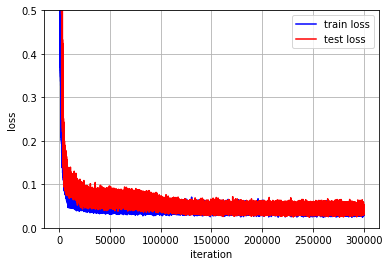

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid()
plt.plot(loss_vec,c='b',linestyle='solid',label='train loss')
plt.plot(test_loss_vec,c='r',label='test loss')

#plt.xlim(60000,60100)
plt.ylim(0,0.5)
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
plt.savefig(str(hidden_size)+'.png')
plt.legend()


#print(test_loss_vec[99999])
#print(test_loss_vec[99999])

In [11]:
# 重みの保存
saver = tf.train.Saver()
saver.save(sess, './model.ckpt')


'./model.ckpt'

In [12]:
'''
# ボール座標とスティックの傾きプロット
by_max=IN_train.max(axis=0)[1]
by_min=IN_train.min(axis=0)[1]

ball_y = np.array(range(int(by_min)-3,int(by_max)+3))
for i in range(len(ball_y)):
    
    ball = np.array([[6.0, ball_y[i]/10.0]])
    
    print(ball)
    joy = sess.run(final_output, feed_dict={INPUT: ball})
    plt.scatter(ball[0][1],ball[0][0], s=200, c='orange')
    
    plt.quiver(0,0,-joy[0][0],-joy[0][1],angles="xy",scale_units="xy",scale=1)
    #plt.quiver(0,0,-0.6,5,angles="xy",scale_units="xy",scale=1)
    print(joy)
    plt.savefig(str(hidden_size)+'_img'+'.png')
    '''

'\n# ボール座標とスティックの傾きプロット\nby_max=IN_train.max(axis=0)[1]\nby_min=IN_train.min(axis=0)[1]\n\nball_y = np.array(range(int(by_min)-3,int(by_max)+3))\nfor i in range(len(ball_y)):\n    \n    ball = np.array([[6.0, ball_y[i]/10.0]])\n    \n    print(ball)\n    joy = sess.run(final_output, feed_dict={INPUT: ball})\n    plt.scatter(ball[0][1],ball[0][0], s=200, c=\'orange\')\n    \n    plt.quiver(0,0,-joy[0][0],-joy[0][1],angles="xy",scale_units="xy",scale=1)\n    #plt.quiver(0,0,-0.6,5,angles="xy",scale_units="xy",scale=1)\n    print(joy)\n    plt.savefig(str(hidden_size)+\'_img\'+\'.png\')\n    '

In [13]:
# 重みのrestore
predicts_sess = tf.Session(config=config)
ckpt = tf.train.get_checkpoint_state('./')
if ckpt == None:
    print('!!!!!!!WEIGHTS NOT FOUND!!!!!!')

saver.restore(predicts_sess, './model.ckpt')

INFO:tensorflow:Restoring parameters from ./model.ckpt
